<a href="https://colab.research.google.com/github/feguedes/Projetos-de-DS/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Violência no Rio de Janeiro

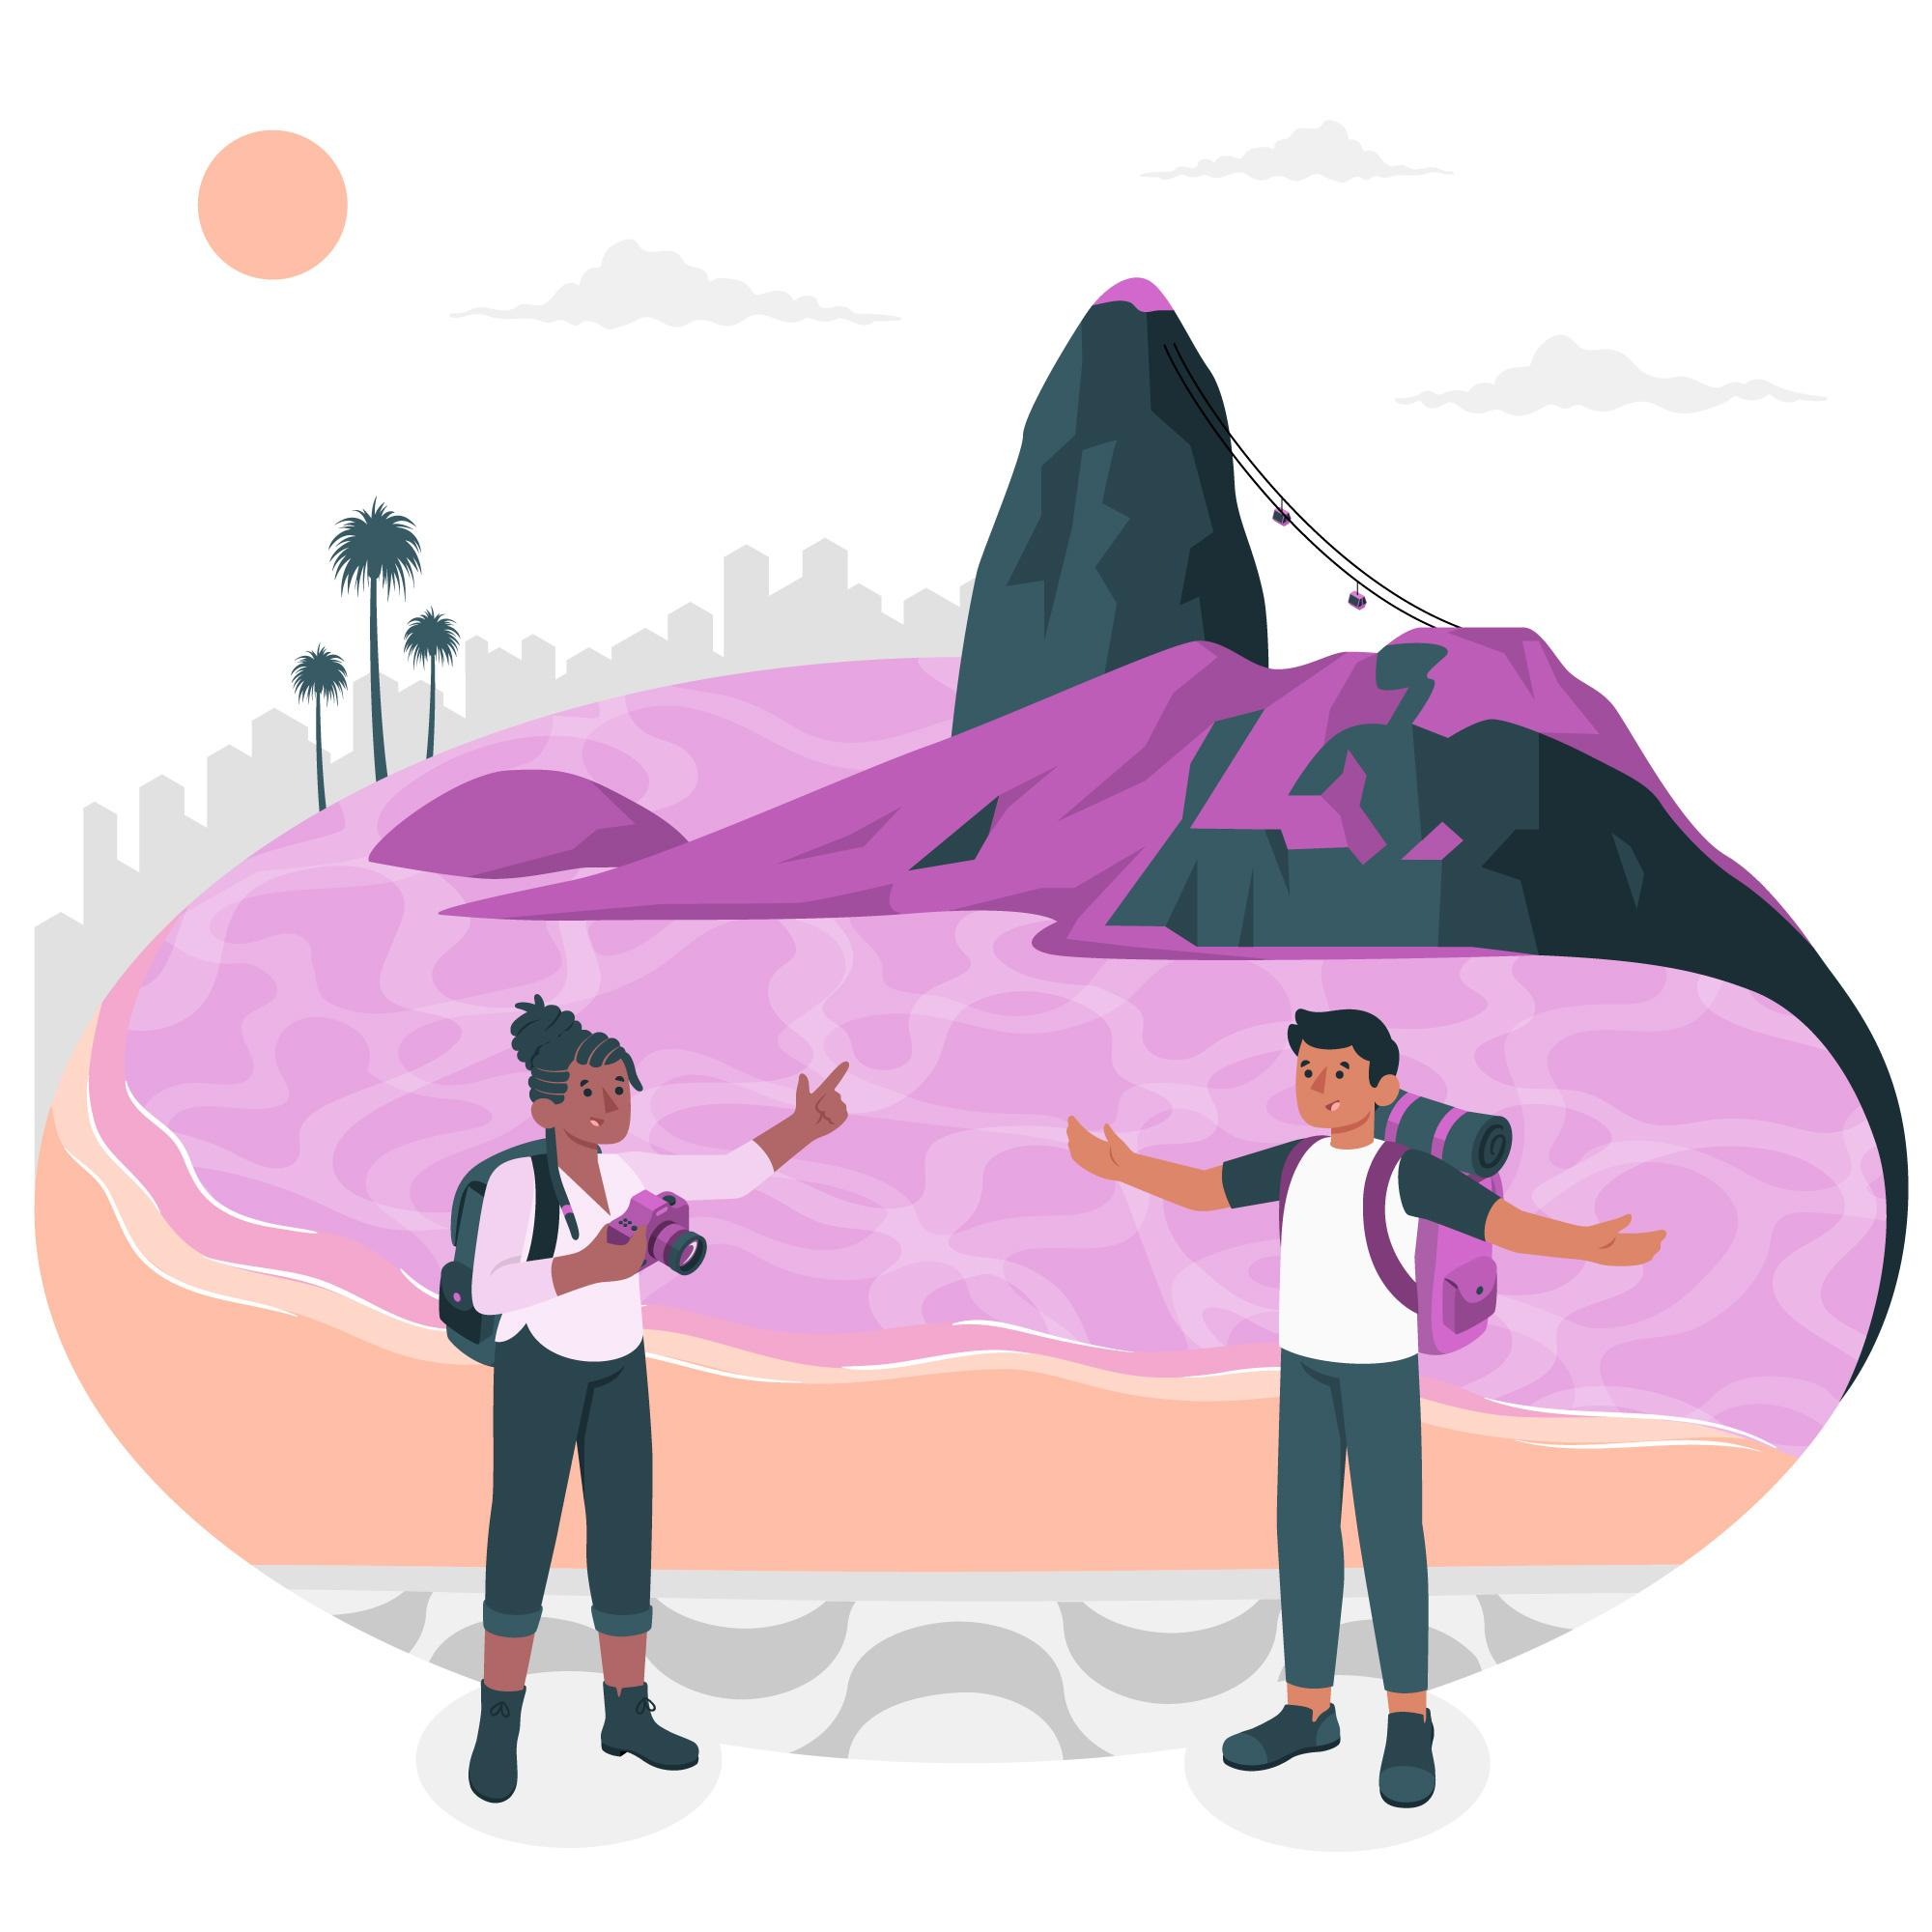

<a href="http://www.freepik.com">Designed by stories / Freepik</a>

# Analisando a Violência no Rio de Janeiro

Sabemos hoje que a violência no Brasil é uma realidade, principalmente nos grandes estados como São Paulo e Rio de Janeiro. Neste projeto irei demonstrar brevemente indicadores estatísticos da violência referentes ao estado do Rio de Janeiro, todos os dados foram obtidos pelo site do Governo do Estado do Rio de Janeiro [ISP](“http://www.ispdados.rj.gov.br/estatistica.html”). 

## Obtenção dos Dados


Os dados obtidos para está análise são reais e são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). Essas estatísticas foram divulgadas no próprio portal a partir de Registros de Ocorrências (RO) nas delegacias de Polícia Civil do Estado do Rio de Janeiro.
O link para o *dataset* utilizado nesta análise pode ser baixado [aqui](https://raw.githubusercontent.com/feguedes/Projetos-de-DS/main/DOMensalEstadoDesde1991.csv).


### Importando os dados

Vamos importar os dados utilizando a biblioteca Pandas `df = pd.read_csv("endereço_do_csv")`

In [41]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/feguedes/Projetos-de-DS/main/DOMensalEstadoDesde1991.csv")

## Análise Inicial dos Dados


Para termos noção do nosso *dataset* e de como estão os dados vamos analisar alguns padrões.

Quantas entradas e variaveis teremos neste *dataset*.

In [5]:
print("Entrada:", df.shape[1])
print("Variaveis:", df.shape[0])

Entrada: 56
Variaveis: 344


Sabendo a dimensão do *dataset* que temos já é possivel ter uma visão sobre os dados.
Agora as variáveis disponíveis.

In [9]:
print(df.columns)

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

Olhando o conjunto de variáveis conseguimos ter uma noção dos datos que serão apresentados, saber o tipo de variável é tão importante quanto, então iremos analisar os tipos de variáveis.

In [10]:
df.dtypes

vano                            int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veiculos                  int64
furto_transe

Acima vimos que as colunas ou variáveis são os tipos de crimes, como: furto_veiculos, apreensao_drogas etc... .

Para uma melhor compreensão vemos que todas as variáveis são do tipo `int` ou `float`logo todas são numéricas.
Agora podemos olhar nosso *dataset* e entender como está distribuido. 

In [11]:
df.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,NaN,350,188,1174,63,967,381,37,NaN,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,NaN,357,171,1097,64,963,432,35,NaN,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,NaN,443,191,1265,71,963,422,43,NaN,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,NaN,425,199,1415,81,1186,354,36,NaN,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,NaN,553,231,1449,82,931,335,27,NaN,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Observe á cima que as informações estão ordenadas por ano e mês.

Agora iremos calcular a porcentagem de valores ausentes do nosso *dataset*, somando todos os valores nulos e dividindo pelo número de entradas.

In [40]:
(df.isnull().sum()/ df.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.802326
furto_bicicleta               0.802326
apreensao_drogas_sem_autor    0.523256
posse_drogas                  0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
trafico_drogas                0.523256
cmba                          0.523256
sequestro_relampago           0.418605
furto_coletivo                0.418605
extorsao                      0.418605
furto_celular                 0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estupro                       0.418605
estelionato                   0.418605
pol_civis_mortos_serv         0.418605
pol_militares_mortos_serv     0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
lesao_corp_culposa            0.279070
ameaca                        0.279070
sequestro                

Como podemos observar a cima a quantidade de valores ausentes como roubo_bicicleta e furto_bicicleta tem 80% dos valores ausentes.
Podemos trazer esses números mais proximos da realidade utilizando os dados a partir da data de registro.
Talvez a nossa analise poderia ser feita anualmente para ter um dado mais preciso.
* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)
Assim os dados ausentes perderiam consideravelmente sua influência.

## Informações Estatísticas da Violência no Rio de Janeiro

Como o intervalo entre a composição desse *dataset* é muito grande, iniciando em 1991 podemos observar que existem muitos dados ausentes. Crimes que provavelmente não aconteceram como roubo de celular.
Entretanto não podemos descartar que a forma na qual esses dados foram registrados. Dada as condições de organização do Brasil os dados podem ter sido perdidos ou não registrados.
Para uma análise mais apurada vamos observar o quanto esses dados ausentes podem prejudicar, em seguida decidiremos por tirar ou não os dados ausentes.

In [24]:
df.describe()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
count,344.000000,344.000000,344.000000,248.000000,344.000000,260.00000,344.000000,344.000000,200.000000,260.000000,248.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,200.000000,236.000000,200.000000,200.000000,68.000000,344.000000,344.000000,344.000000,344.000000,200.000000,200.000000,68.000000,344.000000,344.000000,248.000000,200.000000,200.000000,200.000000,344.000000,164.000000,164.000000,164.000000,344.000000,164.000000,164.000000,164.000000,164.000000,248.000000,212.000000,344.000000,212.000000,200.000000,200.00000,344.000000,344.000000,344.000000,248.000000,344.000000
mean,2004.837209,6.453488,504.555233,4.334677,15.668605,71.90000,318.267442,5492.799419,369.945000,212.119231,3410.762097,455.005814,133.284884,2448.697674,340.322674,3418.520349,659.002907,9.375000,3.550000,957.974576,11.320000,145.665000,10.808824,1211.223837,9428.119186,1674.671512,1518.921512,650.230000,1449.175000,124.808824,5994.328488,10433.177326,0.665323,133.265000,7.755000,2231.860000,1071.930233,609.237805,759.146341,186.146341,1772.238372,2319.585366,568.628049,1255.512195,83.042683,5530.326613,435.132075,66.261628,3.301887,2.085000,0.34000,577.691860,4734.738372,2448.697674,53794.161290,2.994186
std,8.289036,3.447759,113.774481,2.755357,5.861427,36.48882,127.606645,1514.220579,94.392434,54.234700,776.156561,119.765076,44.317963,789.689559,223.855243,2459.017549,297.622342,10.564894,2.634808,624.309034,6.404113,55.392367,7.767628,800.576723,4578.013053,294.852020,971.853102,268.836273,368.638776,80.247427,1964.767779,3696.725756,0.959128,43.303821,5.089646,772.093064,643.381991,246.307700,312.871487,36.221243,656.761843,650.520866,248.040620,357.035450,62.951374,1100.752625,65.353516,34.464519,2.192922,1.761616,0.63752,104.973929,3204.054864,789.689559,11039.051992,0.076138
min,1991.000000,1.000000,272.000000,0.000000,2.000000,10.00000,122.000000,2350.000000,188.000000,111.000000,848.000000,243.000000,49.000000,1097.000000,59.000000,688.000000,281.000000,0.000000,0.000000,0.000000,1.000000,11.000000,0.000000,81.000000,3261.000000,1159.000000,322.000000,23.000000,484.000000,0.000000,2322.000000,4691.000000,0.000000,23.000000,0.000000,717.000000,80.000000,248.000000,262.000000,114.000000,729.000000,1173.000000,225.000000,628.000000,21.000000,1409.000000,236.000000,0.000000,0.000000,0.000000,0.00000,334.000000,1086.000000,1097.000000,30621.000000,2.000000
25%,1998.000000,3.000000,413.750000,2.000000,11.000000,41.75000,200.000000,4067.000000,282.000000,176.000000,3040.000000,365.750000,103.750000,1889.750000,208.250000,1053.000000,430.750000,2.000000,2.000000,549.750000,6.000000,106.000000,2.250000,811.750000,5107.750000,1430.500000,732.000000,501.000000,1297.000000,3.750000,3978.000000,6700.250000,0.000000,109.750000,4.750000,1654.500000,714.500000,360.500000,426.000000,160.000000,1276.750000,1681.000000,332.500000,950.500000,46.000000,4868.500000,390.000000,42.000000,2.000000,1.000000,0.00000,500.000000,1557.000000,1889.750000,45374.500000,3.000000
50%,2005.000000,6.000000,507.000000,4.000000,15.000000,70.00000,318.500000,5830.500000,384.000000,203.000000,3372.000000,433.500000,125.000000,2322.000000

Aqui conseguimos medir a quantidade, média, desvio padrão, minimo e maximo e suas respectivas porcentagens dos registros.
Exemplo se olhar na coluna lesao_corp_morte na linha "mean" perceberá que o número médio de lesao_corp_morte registrada no mês durante o periodo de registro foram de 4.

### Crimes Contra o Patrimônio - Veículos

Como o crime de furto e roubo de veículo é um problema comum nas grandes metrópoles. Temos dados suficientes para uma análise sobre o combate desse crime.
Abaixo iremos verificar a média de roubo de veiculo por mês.

In [25]:
# média de roubo de veiculos
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(round(mean_roubo_veiculo,2))

2448.7


A média de roubo de veiculo por mês é de  2.448,7.

In [26]:
# média de furtos de veiculos
mean_furto_veiculo = df.furto_veiculos.mean()
print(round(mean_furto_veiculo,2))

1674.67


Já os furtos de veículos não fica tão atras, sendo registrados 1.674,67 furtos por mês.

In [27]:
# média de recuperação de veiculos
mean_recuperacao_veiculo = df.recuperacao_veiculos.mean()
print(round(mean_recuperacao_veiculo,2))

1772.24


Temos uma média de recuperação de veículos de 1.772,24

Vamos análisar qual a porcentagem de veículos recuperados juntando os veículos furtador e roubados.

In [32]:

mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()

total = mean_roubo_veiculo + mean_furto_veiculo
print('Média de Veículos Perdidos por Mês: {:.2f} '.format(total))
print('Veículos Recuperados por Mês: {:.2f}'.format(mean_recuperacao_veiculos))

pct = mean_recuperacao_veiculos/total*100

print('{:.2f}% dos veículos roubados ou furtados são recuperados.'.format(pct))

Média de Veículos Perdidos por Mês: 4123.37 
Veículos Recuperados por Mês: 1772.24
42.98% dos veículos roubados ou furtados são recuperados.


### Crimes Contra a Vida
A seguir iremos verificar os valores máximos e mínimos para `hom_doloso`.

In [37]:

max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


 Como mostrado acima o menor número de homicídios doloso registrado no mês foi de 272 e o maior registro no mês foi de 831.
 Agora aprofundaremos nestas entradas.


In [38]:
df[df.hom_doloso == 272]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
293,2015,6,272,2.0,16,44.0,477,5535,389.0,140.0,3369.0,465,96,2254,566,4421,619,3,1.0,896.0,5.0,106.0,3.0,1243,10678,1333,2974,968.0,1514.0,5.0,7475,14269,0.0,192.0,10.0,2940.0,2134,845.0,1134.0,204.0,1768,3128.0,798.0,1676.0,57.0,5678.0,493.0,52,4.0,1.0,1.0,334,5936,2254,60357.0,3


In [39]:
df[df.hom_doloso == 831]

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
48,1995,1,831,NaN,17,NaN,166,3626,NaN,NaN,NaN,323,174,2060,188,1056,377,38,NaN,NaN,NaN,NaN,NaN,134,4350,1924,520,NaN,NaN,NaN,2941,5385,NaN,NaN,NaN,NaN,147,NaN,NaN,NaN,1435,NaN,NaN,NaN,NaN,NaN,NaN,98,NaN,NaN,NaN,848,1433,2060,NaN,3


Conseguimos observar que no mês 1 de 1995 foram registrados 831 homicídios doloso e no mês 6 de 2015 apenas 272 registros de homicídios doloso, será que realmente esses crimes estão diminuindo ou é uma ilusão.
Para isso precisaremos de uma análise mais profunda.


## Visualização de Dados

Utilizaremos um histograma para melhor visualização de homicídio doloso.


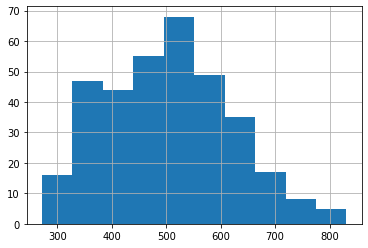

In [17]:
df.hom_doloso.hist();

Como no histograma á cima podemos concluir que quase 70 meses durante todo esse periodo foram registrados cerca de 550.
Em apenas 10 meses de todo o periodo os registros chegaram a marca de 800 no mês.

Por fim iremos demonstrar com um gráfico de linhas o aumento do roubo em coletivo.

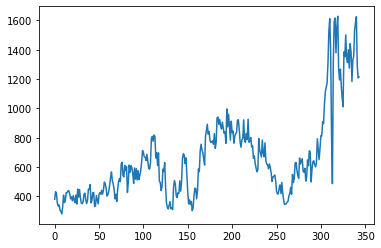

In [23]:
df.roubo_em_coletivo.plot();

E com esse gráfico mostramos a visivel alta em roubo em coletivo.

## Conclusão

Os números não mentem, infelizmente olhar esses dados e ver a quantidade de crimes cometidos é assustador. Essa análise breve mostra que você pode com poucas linhas de programação levantar dados importantes de maneira fácil.
Hoje temos muitos dados disponíveis de forma fácil e gratuita, infelizmente os dados nem sempre viram de forma organizada, principalmente os dados do Brasil que ainda está engatinhando na questão de dados.
Caso queira conhecer mais artigos sobre a análise de dados acesse meu [Blog no médium](“https://medium.com/@feguedes.dev”) ou meu [LinkedIn](“https://www.linkedin.com/in/felipe-guedes-9966b911a/’)